In [1]:
path = 'd:/users/jlevy/documents/python bb/'

# Pandas: Data Analysis in Python

The Pandas library, based closely on R dataframes, is the foundation of most data work in Python.  We'll begin with importing and merging some data from file.

In [2]:
import pandas as pd

file_name  = 'WB_military.csv'
xwalk_name = 'UN_Regions.csv'

df    = pd.read_csv(path+file_name,  encoding='ISO-8859-1', sep='\t', skipfooter=5, na_values='..')
xwalk = pd.read_csv(path+xwalk_name, encoding='ISO-8859-1')

In [3]:
df[:5]

Time Time Code    Country Name Country Code  \
0  1990    YR1990     Afghanistan          AFG   
1  1990    YR1990         Albania          ALB   
2  1990    YR1990         Algeria          DZA   
3  1990    YR1990  American Samoa          ASM   
4  1990    YR1990         Andorra          ADO   

   Military expenditure (% of GDP) [MS.MIL.XPND.GD.ZS]  \
0                                                NaN     
1                                           5.888301     
2                                           1.457359     
3                                                NaN     
4                                                NaN     

   Military expenditure (% of central government expenditure) [MS.MIL.XPND.ZS]  \
0                                                NaN                             
1                                                NaN                             
2                                                NaN                             
3                                                NaN                             
4                                                NaN                             

   Armed forces personnel, total [MS.MIL.TOTL.P1]  \
0                                         58000.0   
1                                             NaN   
2                                        126000.0   
3                                             NaN   
4                                             NaN   

   Armed forces personnel (% of total labor force) [MS.MIL.TOTL.TF.ZS]  \
0                                           1.880981                     
1                                                NaN                     
2                                           2.028753                     
3                                                NaN                     
4                                                NaN                     

   Arms exports (SIPRI trend indicator values) [MS.MIL.XPRT.KD]  \
0                                                NaN              
1                                                NaN              
2                                                NaN              
3                                                NaN              
4                                                NaN              

   Arms imports (SIPRI trend indicator values) [MS.MIL.MPRT.KD]  
0                                       1.900000e+09             
1                                                NaN             
2                                       7.350000e+08             
3                                                NaN             
4                                                NaN

In [4]:
xwalk[:5]

Region   Country
0  Eastern Africa   Burundi
1  Eastern Africa   Comoros
2  Eastern Africa  Djibouti
3  Eastern Africa   Eritrea
4  Eastern Africa  Ethiopia

**Now we use Pandas merging ability to combine the crosswalk and the main dataframe**

In [5]:
df = df.merge(xwalk, left_on='Country Name', right_on='Country', how='outer', indicator=True)
df[:5]

Time Time Code Country Name Country Code  \
0  1990.0    YR1990  Afghanistan          AFG   
1  2000.0    YR2000  Afghanistan          AFG   
2  2007.0    YR2007  Afghanistan          AFG   
3  2008.0    YR2008  Afghanistan          AFG   
4  2009.0    YR2009  Afghanistan          AFG   

   Military expenditure (% of GDP) [MS.MIL.XPND.GD.ZS]  \
0                                                NaN     
1                                                NaN     
2                                           2.237069     
3                                           2.328003     
4                                           2.060751     

   Military expenditure (% of central government expenditure) [MS.MIL.XPND.ZS]  \
0                                                NaN                             
1                                                NaN                             
2                                           9.322346                             
3                                           4.626862                             
4                                           4.675714                             

   Armed forces personnel, total [MS.MIL.TOTL.P1]  \
0                                         58000.0   
1                                        400000.0   
2                                         51000.0   
3                                         94000.0   
4                                        255745.0   

   Armed forces personnel (% of total labor force) [MS.MIL.TOTL.TF.ZS]  \
0                                           1.880981                     
1                                           8.292278                     
2                                           0.788009                     
3                                           1.414847                     
4                                           3.749151                     

   Arms exports (SIPRI trend indicator values) [MS.MIL.XPRT.KD]  \
0                                                NaN              
1                                                NaN              
2                                                NaN              
3                                                NaN              
4                                                NaN              

   Arms imports (SIPRI trend indicator values) [MS.MIL.MPRT.KD]  \
0                                       1.900000e+09              
1                                                NaN              
2                                       4.100000e+07              
3                                       1.500000e+08              
4                                       3.440000e+08              

          Region      Country _merge  
0  Southern Asia  Afghanistan   both  
1  Southern Asia  Afghanistan   both  
2  Southern Asia  Afghanistan   both  
3  Southern Asia  Afghanistan   both  
4  Southern Asia  Afghanistan   both

**We can select subsets of a Pandas dataframe easily, in the format:**

    dataframe[where some condition is true]

If the condition is testing for a specific value in a column, the condition may take the format:
 
    dataframe[column] == 'condition'
    
When combined, we get:

    dataframe[dataframe[column] == 'condition']
    
On our current dataset, then:

In [6]:
left_only  = df[df['_merge'] == 'left_only']
right_only = df[df['_merge'] == 'right_only']
df         = df[df['_merge'] == 'both']

print(len(left_only))
print(len(right_only))
print(len(df))

348
53
2256


In [7]:
left_only['Country Name'].unique()

array(['Bahamas, The', 'Bolivia', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Curacao', 'Egypt, Arab Rep.', 'Faroe Islands', 'Gambia, The',
       'Hong Kong SAR, China', 'Iran, Islamic Rep.',
       'Korea, Dem. People\x92s Rep.', 'Korea, Rep.', 'Kosovo',
       'Kyrgyz Republic', 'Lao PDR', 'Macao SAR, China', 'Macedonia, FYR',
       'Micronesia, Fed. Sts.', 'Moldova', 'Slovak Republic',
       'St. Kitts and Nevis', 'St. Lucia',
       'St. Vincent and the Grenadines', 'Tanzania', 'Venezuela, RB',
       'Vietnam', 'Virgin Islands (U.S.)', 'West Bank and Gaza',
       'Yemen, Rep.'], dtype=object)

In [8]:
# Find any country name in the crosswalk that contains the characters "Iran"
xwalk[
      xwalk['Country'].str.contains('Iran')
      ]

Region                     Country
129  Southern Asia  Iran (Islamic Republic of)

**Now we will _group_ our dataframe by regions and look at military spending that way**

In [9]:
df.columns

Index(['Time', 'Time Code', 'Country Name', 'Country Code',
       'Military expenditure (% of GDP) [MS.MIL.XPND.GD.ZS]',
       'Military expenditure (% of central government expenditure) [MS.MIL.XPND.ZS]',
       'Armed forces personnel, total [MS.MIL.TOTL.P1]',
       'Armed forces personnel (% of total labor force) [MS.MIL.TOTL.TF.ZS]',
       'Arms exports (SIPRI trend indicator values) [MS.MIL.XPRT.KD]',
       'Arms imports (SIPRI trend indicator values) [MS.MIL.MPRT.KD]',
       'Region', 'Country', '_merge'],
      dtype='object')

In [10]:
total_mil = df.columns.values[6]
perc_gdp = df.columns.values[4]

print(total_mil)
print(perc_gdp)

Armed forces personnel, total [MS.MIL.TOTL.P1]
Military expenditure (% of GDP) [MS.MIL.XPND.GD.ZS]


In [11]:
by_region = df.groupby('Region').agg({total_mil:'sum', perc_gdp:'mean'})
by_region[:5]

Armed forces personnel, total [MS.MIL.TOTL.P1]  \
Region                                                                      
Australia and New Zealand                                        661100.0   
Caribbean                                                       1555916.0   
Central America                                                 4280174.0   
Central Asia                                                    1746600.0   
Eastern Africa                                                  7474180.0   

                           Military expenditure (% of GDP) [MS.MIL.XPND.GD.ZS]  
Region                                                                          
Australia and New Zealand                                           1.616890    
Caribbean                                                           1.085204    
Central America                                                     0.662078    
Central Asia                                                        1.047478    
Eastern Africa                                                      2.199662

In [12]:
by_region[perc_gdp] = by_region[perc_gdp] * .01
by_region[:5]

Armed forces personnel, total [MS.MIL.TOTL.P1]  \
Region                                                                      
Australia and New Zealand                                        661100.0   
Caribbean                                                       1555916.0   
Central America                                                 4280174.0   
Central Asia                                                    1746600.0   
Eastern Africa                                                  7474180.0   

                           Military expenditure (% of GDP) [MS.MIL.XPND.GD.ZS]  
Region                                                                          
Australia and New Zealand                                           0.016169    
Caribbean                                                           0.010852    
Central America                                                     0.006621    
Central Asia                                                        0.010475    
Eastern Africa                                                      0.021997

# Dates in Python

**Datetime object:**

Now we create two _date objects_, January 1st 2010 and December 31st 2015.

In [15]:
import datetime

start = datetime.datetime(2010, 1, 1)
end   = datetime.datetime(2015, 12, 31)

print(end)
print('day:', end.day)
print('month:', end.month)
print('year', end.year)

2015-12-31 00:00:00
day: 31
month: 12
year 2015


**Timedelta object:**

One of the most important properties of datetime objects is the ability to accurately perform math operations on them.

In [17]:
elapsed = end - start
print('elapsed days:', elapsed.days)

elapsed days: 2190


# Retrieve a Time Series from FRED

We will use the Pandas module to easily interface with the Federal Reserve Board of St. Louis database of economic statisics (FRED) and download several different series.

**Also works for: World Bank, OECD, Google Analytics, Google Finance, Yahoo! Finance, Fama/French, and others**

We will download three series from the FRED database: GDP (quarterly), GNP (quarterly) and the CPI less food and energy (monthly).

In [18]:
import numpy as np
from pandas_datareader import data

macro = data.DataReader(['GDP', 'GNP', 'CPILFESL'], "fred", start, end)
macro[:10]

GDP      GNP  CPILFESL
DATE                                  
2010-01-01  14681.1  14884.7   220.633
2010-02-01      NaN      NaN   220.731
2010-03-01      NaN      NaN   220.783
2010-04-01  14888.6  15093.9   220.822
2010-05-01      NaN      NaN   220.962
2010-06-01      NaN      NaN   221.194
2010-07-01  15057.7  15257.4   221.363
2010-08-01      NaN      NaN   221.509
2010-09-01      NaN      NaN   221.711
2010-10-01  15230.2  15445.4   221.830

In [19]:
quarterly = macro.resample('QS').mean()
quarterly[:10]

GDP      GNP    CPILFESL
DATE                                    
2010-01-01  14681.1  14884.7  220.715667
2010-04-01  14888.6  15093.9  220.992667
2010-07-01  15057.7  15257.4  221.527667
2010-10-01  15230.2  15445.4  222.107333
2011-01-01  15238.4  15466.5  223.156667
2011-04-01  15460.9  15692.0  224.199667
2011-07-01  15587.1  15842.6  225.732667
2011-10-01  15785.3  16057.1  226.936667
2012-01-01  15973.9  16225.1  228.140667
2012-04-01  16121.9  16353.3  229.280667

In [20]:
quarterly[['GDP_ld', 'GNP_ld', 'CPILFESL_ld']] = np.log( quarterly ) - np.log( quarterly.shift() )
quarterly[:10]

GDP      GNP    CPILFESL    GDP_ld    GNP_ld  CPILFESL_ld
DATE                                                                     
2010-01-01  14681.1  14884.7  220.715667       NaN       NaN          NaN
2010-04-01  14888.6  15093.9  220.992667  0.014035  0.013957     0.001254
2010-07-01  15057.7  15257.4  221.527667  0.011294  0.010774     0.002418
2010-10-01  15230.2  15445.4  222.107333  0.011391  0.012247     0.002613
2011-01-01  15238.4  15466.5  223.156667  0.000538  0.001365     0.004713
2011-04-01  15460.9  15692.0  224.199667  0.014496  0.014475     0.004663
2011-07-01  15587.1  15842.6  225.732667  0.008129  0.009551     0.006814
2011-10-01  15785.3  16057.1  226.936667  0.012635  0.013449     0.005320
2012-01-01  15973.9  16225.1  228.140667  0.011877  0.010408     0.005291
2012-04-01  16121.9  16353.3  229.280667  0.009222  0.007870     0.004984

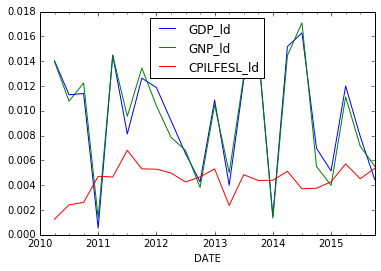

In [21]:
%matplotlib inline
quarterly[['GDP_ld', 'GNP_ld', 'CPILFESL_ld']].plot()

# Automate a Download

Here we use Python to download a file from the Census Business Dynamics files automatically.  The source page is at: http://www.census.gov/ces/dataproducts/bds/data_estab.html

In [22]:
import requests

url = 'http://www2.census.gov/ces/bds/estab/bds_e_st_release.csv'

name = 'state.csv'

r = requests.get(url)
    
with open(path+name, 'wb') as ofile:
    ofile.write(r.content)

In [23]:
urls = [['state.csv',  'http://www2.census.gov/ces/bds/estab/bds_e_st_release.csv'],
        ['age.csv',    'http://www2.census.gov/ces/bds/estab/bds_e_age_release.csv'],
        ['sector.csv', 'http://www2.census.gov/ces/bds/estab/bds_e_sic_release.csv']]

for name, url in urls:
    r = requests.get(url)
    with open(path+name, 'wb') as ofile:
        ofile.write(r.content)

# Parse Data out of an HTML Table

Not all data we might want to work with is in a convenient format for us to download.  Now we'll use Python to parse an html table on primary school grades from Tanzania, found at http://maktaba.tetea.org/exam-results/FTNA2015/formtwo-2015.html, into a standard csv file.

In [25]:
from bs4 import BeautifulSoup

headers = {'user-agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/53.0.2785.116 Safari/537.36'}

url = 'http://maktaba.tetea.org/exam-results/FTNA2015/S0206.htm'

r = requests.get(url, headers=headers)
soup = BeautifulSoup(r.text, 'lxml')

soup.text[1000:2000]

'NAME OF CANDIDATEX..........D....GPACLASS0001AGNESS M NHENDEFCDDBCEECFED1.7CREDIT0002AGNESS P KAWIAFAbsentABS0003AJESTA N MBWILOFAB+BB+ACAB+DBB+A4.6DISTINCTION0004ALBERTINA A KITONKAFAB+AB+ABAACB+B+4.7DISTINCTION0005ANGELINA H HAULEFABBBACBAEFC3.9DISTINCTION0006ANITHA M BUBERWAFAAAAABAACAB5.0DISTINCTION0007ANNA J HHAIMAFCEDBB+EFFCEF1.7CREDIT0008ASHA A MTUIFAB+ABB+ACAADCC4.7DISTINCTION0009AZIZA M NJIMWEFEEEDCDFFDFFF0.7PASS0010BEATRICE G SOGOLELAFDCEBB+EECEDCE2.1CREDIT0011BEATRICE P RUGAIMBILAFABB+BACBAEEB+C4.1DISTINCTION0012BETINA B MWASOMOLAFB+B+B+B+BDDB+EDBC3.7DISTINCTION0013BITRES Y CHAULAFB+B+B+B+AB+B+AADB+4.4DISTINCTION0014CATHERINE K OWUYAFAB+B+B+AB+CBADB+4.4DISTINCTION0015DAFIA M NASSOROFEEFFCDFFFEFF0.4PASS0016DEBORA D LEONCEFAAAAAAB+AACA5.0DISTINCTION0017DEBORA H NINDIFB+BB+B+B+BB+AECB+B+4.1DISTINCTION0018DEBORA J MBWANAFBEDCB+DCCEEDD2.1CREDIT0019DOREEN Z MOSSESFABB+B+AB+AABAAB+4.9DISTINCTION0020DORICE A MBAMBALEFB+B+B+B+ABB+ADAAB4.6DISTINCTION0021EDA P KYOMOFBBB+BABBADBD3.7DIS

In [26]:
table = soup.find('table')

rows = []

for row in table.find_all('tr'):
    rows.append([val.text for val in row.find_all('td')])

In [29]:
print(rows[24])
print(rows[25])
print(rows[26])

['0001', '', 'AGNESS M NHENDE', 'F', 'C', 'D', 'D', '', 'B', 'C', '', 'E', 'E', 'C', 'F', 'E', 'D', '', '', '1.7', 'CREDIT']
['0002', '', 'AGNESS P KAWIA', 'F', 'Absent', 'ABS']
['0003', '', 'AJESTA N MBWILO', 'F', 'A', 'B+', 'B', '', 'B+', 'A', '', 'C', 'A', 'B+', 'D', 'B', '', 'B+', 'A', '4.6', 'DISTINCTION']


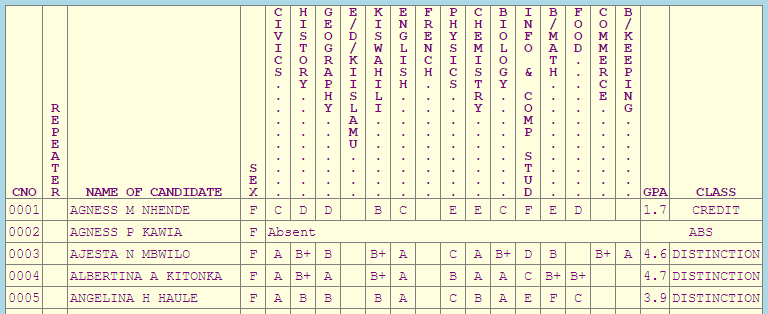

In [28]:
from IPython.display import Image
Image(filename='grades.PNG')

In [30]:
name = 'grades.csv'

with open(path+name, 'w') as ofile:
    
    for row in rows[24:152]:
        
        if row[4] != 'Absent':
            line = ','.join(row) + '\n'
        
        elif row[4] == 'Absent':
            values = row[:4] + ['Absent']*17 + ['\n']
            line = ','.join(values)
            
        ofile.write(line)

In [32]:
header = ['CNO','Repeat','Name','Sex','CIV','HIST','GEO','EDK','KIS','ENG','FRN','PHY',
          'CHEM','BIO','COMP','MATH','FOOD','COMM','KEEP','GPA','CLASS']

df = pd.read_csv(path+name, names=header)

df[:5]

CNO  Repeat                 Name Sex     CIV    HIST     GEO     EDK  \
0    1     NaN      AGNESS M NHENDE   F       C       D       D     NaN   
1    2     NaN       AGNESS P KAWIA   F  Absent  Absent  Absent  Absent   
2    3     NaN      AJESTA N MBWILO   F       A      B+       B     NaN   
3    4     NaN  ALBERTINA A KITONKA   F       A      B+       A     NaN   
4    5     NaN     ANGELINA H HAULE   F       A       B       B     NaN   

      KIS     ENG     ...          PHY    CHEM     BIO    COMP    MATH  \
0       B       C     ...            E       E       C       F       E   
1  Absent  Absent     ...       Absent  Absent  Absent  Absent  Absent   
2      B+       A     ...            C       A      B+       D       B   
3      B+       A     ...            B       A       A       C      B+   
4       B       A     ...            C       B       A       E       F   

     FOOD    COMM    KEEP     GPA        CLASS  
0       D     NaN     NaN     1.7       CREDIT  
1  Absent  Absent  Absent  Absent       Absent  
2     NaN      B+       A     4.6  DISTINCTION  
3      B+     NaN     NaN     4.7  DISTINCTION  
4       C     NaN     NaN     3.9  DISTINCTION  

[5 rows x 21 columns]

# Extract Information from PDF

PDF documents are obviously very common, but are also difficult to work with in any systematic way.  Here we'll show one example of using Python to help.  It is possible to use Python to extract information from scanned PDF documents, but the setup is more technical than we can easily demonstrate here.

We will use a research paper in PDF format, Paul Krugman's 1978 "The Theory of Interstellar Trade", downloaded from: http://www.standupeconomist.com/pdf/misc/interstellar.pdf

In [33]:
from tika import parser

name = 'interstellar.pdf'
text = parser.from_file(path+name)

2016-10-25 10:16:55,228 [MainThread  ] [INFO ]  Starting new HTTP connection (1): localhost


In [34]:
lines = text['content'].split('\n')

lines[:20]

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']

In [35]:
lines_noblanks = [line for line in lines if line != '']

lines_noblanks[:16]

['interstellar.dvi',
 'Paul\t\r \xa0Krugman’s\t\r \xa0“The\t\r \xa0theory\t\r \xa0of\t\r \xa0interstellar\t\r \xa0trade”,\t\r \xa0formally\t\r \xa0published\t\r \xa0in\t\r \xa0Economic\t\r \xa0',
 'Inquiry\t\r \xa048:\t\r \xa01119-\xad‐1123\t\r \xa0(2010).\t\r \xa0\t\r \xa0',
 '\t\r \xa0',
 'This\t\r \xa0document\t\r \xa0is\t\r \xa0a\t\r \xa0pre-\xad‐print\t\r \xa0that\t\r \xa0should\t\r \xa0(except\t\r \xa0for\t\r \xa0the\t\r \xa0typesetting\t\r \xa0and\t\r \xa0the\t\r \xa0editor’s\t\r \xa0',
 'note)\t\r \xa0match\t\r \xa0the\t\r \xa0published\t\r \xa0version.\t\r \xa0\t\r \xa0',
 '\t\r \xa0',
 'Posted\t\r \xa0by\t\r \xa0Yoram\t\r \xa0Bauman,\t\r \xa0Economic\t\r \xa0Inquiry\t\r \xa0co-\xad‐editor\t\r \xa0for\t\r \xa0Miscellany,\t\r \xa0Jan\t\r \xa026\t\r \xa02011.\t\r \xa0',
 'Available\t\r \xa0at\t\r \xa0http://www.standupeconomist.com/pdf/misc/interstellar.pdf.\t\r \xa0\t\r \xa0',
 'The Theory of Interstellar Trade',
 'Paul Krugman∗',
 'June 20, 2008',
 'Editor’s note: This article

In [36]:
theories = []
get_next = False

for line in lines_noblanks:
    
    if 'theory' in line:
        current = line + ' '
        get_next = True
    
    elif get_next is True:
        current += line
        theories.append(current)
        get_next = False

In [38]:
print(len(theories))

print(theories[2])

10
observer. A solution is derived from economic theory, and two useless but true theorems are proved.


In [39]:
bibliogrophy = []

is_bib = False

for line in lines_noblanks:
    
    if 'References' in line:
        is_bib = True
        
    if is_bib is True:
        bibliogrophy.append(line)

In [40]:
bibliogrophy[:9]

['5 References',
 'Frankel, J. “Is There Trade With Other Planets?,” processed, International',
 'Monetary Fund, 1975.',
 'Krugman, P. “Theory Capital and Travel Light-than-Faster,” processed, Yale',
 'University, 1987.',
 'Lawden, D. Tensor Calculus and Relativity. 1962.',
 'Ohlin, G. International and Interregional Trade. 1933.',
 'O’Neill, G. The High Frontier. 1976.',
 'Samuelson, P. Foundations of Economic Analysis. 1947.']

# A Few Other Research Uses for Python

- PDF OCR
- natural language processing
- fixing very messy data that can't be loaded due to errors
- agent-based simulations
- organizing a long, modular process
- building a data dictionary automatically
- machine learning (scikit learn)
- statistical analysis (statsmodels)
- symbolic math (like Wolfram Mathematica)
- programs requiring user input
- big data (terabyte, even petabyte-sized data)
- creating presentations (hello!)
- my dissertation (usefulness may vary)